See link for the example

In [1]:
%%html
<a href="https://sarit-maitra.medium.com/markov-regime-switching-non-linear-model-8ebfdf6eb755">link</a>

In [31]:
import probscale
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt

from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

In [3]:
end = dt.date.today()
start = dt.date(end.year - 20, end.month, end.day)
df = yf.download("^GSPC", start, end)
df['returns'] = df['Adj Close'].pct_change()
df = df.dropna()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2001-09-05,1132.939941,1135.520020,1114.859985,1131.739990,1131.739990,1384500000,-0.001059
2001-09-06,1131.739990,1131.739990,1105.829956,1106.400024,1106.400024,1359700000,-0.022390
2001-09-07,1106.400024,1106.400024,1082.119995,1085.780029,1085.780029,1424300000,-0.018637
2001-09-10,1085.780029,1096.939941,1073.150024,1092.540039,1092.540039,1276600000,0.006226
2001-09-17,1092.540039,1092.540039,1037.459961,1038.770020,1038.770020,2330830000,-0.049216


In [4]:
model = MarkovRegression(df['returns'], k_regimes = 3, switching_variance = True)

#need a random seed 
np.random.seed(123)

#we use 50 random pertubations
res = model.fit(search_reps = 50)

C:\Users\Diego\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Diego\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [5]:
print(res.expected_durations)

[27.4594461  36.42247865 41.54687409]


In [6]:
pred = res.predict()
pred = pd.DataFrame(pred)
pred.columns = ["predicted"]
pred['returns'] = df['returns']
pred.tail()

,predicted,returns
Date,,
2021-08-25,0.001011,0.002220
2021-08-26,0.001005,-0.005825
2021-08-27,0.001000,0.008808
2021-08-30,0.000996,0.004307
2021-08-31,0.000985,-0.001349


In [7]:
mod = MarkovRegression(endog = df['returns'], k_regimes = 3)
res = mod.fit()
res.summary()

C:\Users\Diego\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Diego\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                returns   No. Observations:                 5029
Model:               MarkovRegression   Log Likelihood               15486.119
Date:                Wed, 01 Sep 2021   AIC                         -30952.238
Time:                        00:59:04   BIC                         -30887.008
Sample:                             0   HQIC                        -30929.383
                               - 5029                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0362      0.003    -14.027      0.000      -0.041      -0.031
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.002     20.714      0.000       0.037       0.045
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      2.489      0.013    8.06e-05       0.001
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0001   2.86e-06     37.137      0.000       0.000       0.000
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.5626      0.064      8.852      0.000       0.438       0.687
p[1->0]      2.42e-06   1.67e-06      1.453      0.146   -8.44e-07    5.68e-06
p[2->0]        0.0084      0.002      5.076      0.000       0.005       0.012
p[0->1]        0.4373      0.063      6.960      0.000       0.314       0.560
p[1->1]     4.314e-05    4.3e-05      1.002      0.316   -4.12e-05       0.000
p[2->1]        0.0057      0.002      3.511      0.000       0.003       0.009
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

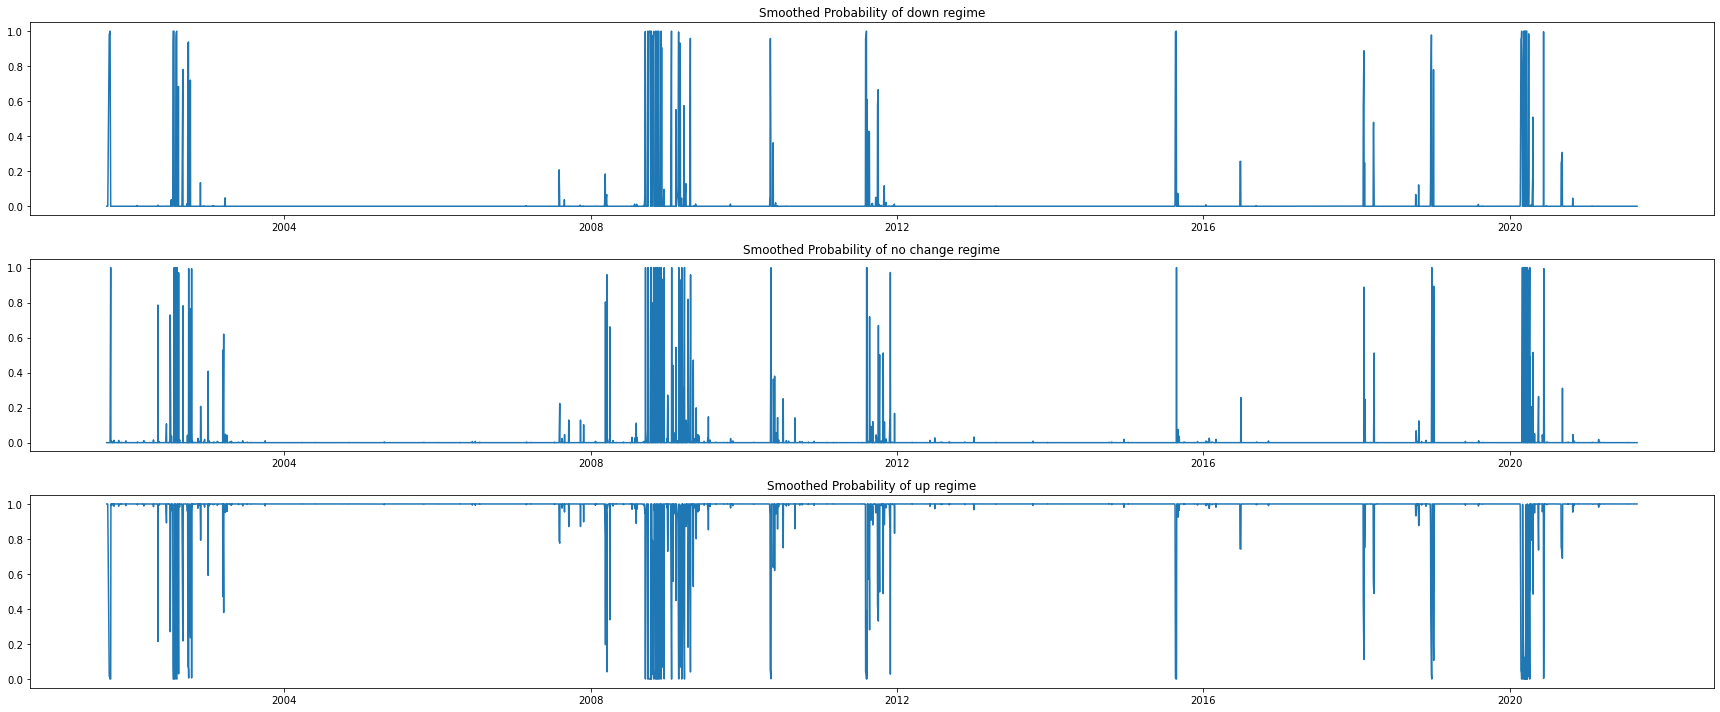

In [8]:
fig, axes = plt.subplots(3, figsize = (24, 10))

axes[0].plot(res.smoothed_marginal_probabilities[0])
axes[0].set_title("Smoothed Probability of down regime")

axes[1].plot(res.smoothed_marginal_probabilities[1])
axes[1].set_title("Smoothed Probability of no change regime")

axes[2].plot(res.smoothed_marginal_probabilities[2])
axes[2].set_title("Smoothed Probability of up regime")

plt.tight_layout()

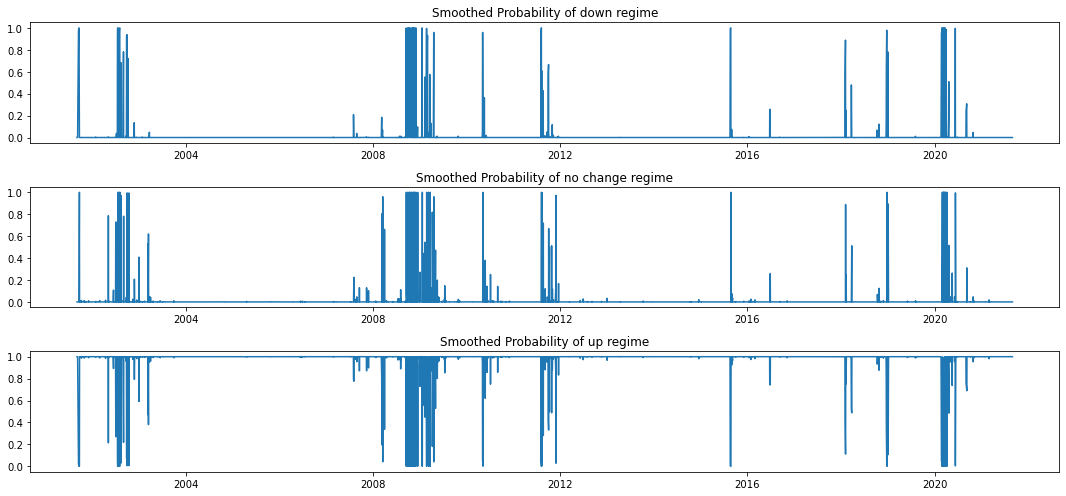

In [9]:
#for writeup output
fig, axes = plt.subplots(3, figsize = (15, 7))

axes[0].plot(res.smoothed_marginal_probabilities[0])
axes[0].set_title("Smoothed Probability of down regime")

axes[1].plot(res.smoothed_marginal_probabilities[1])
axes[1].set_title("Smoothed Probability of no change regime")

axes[2].plot(res.smoothed_marginal_probabilities[2])
axes[2].set_title("Smoothed Probability of up regime")

plt.tight_layout()

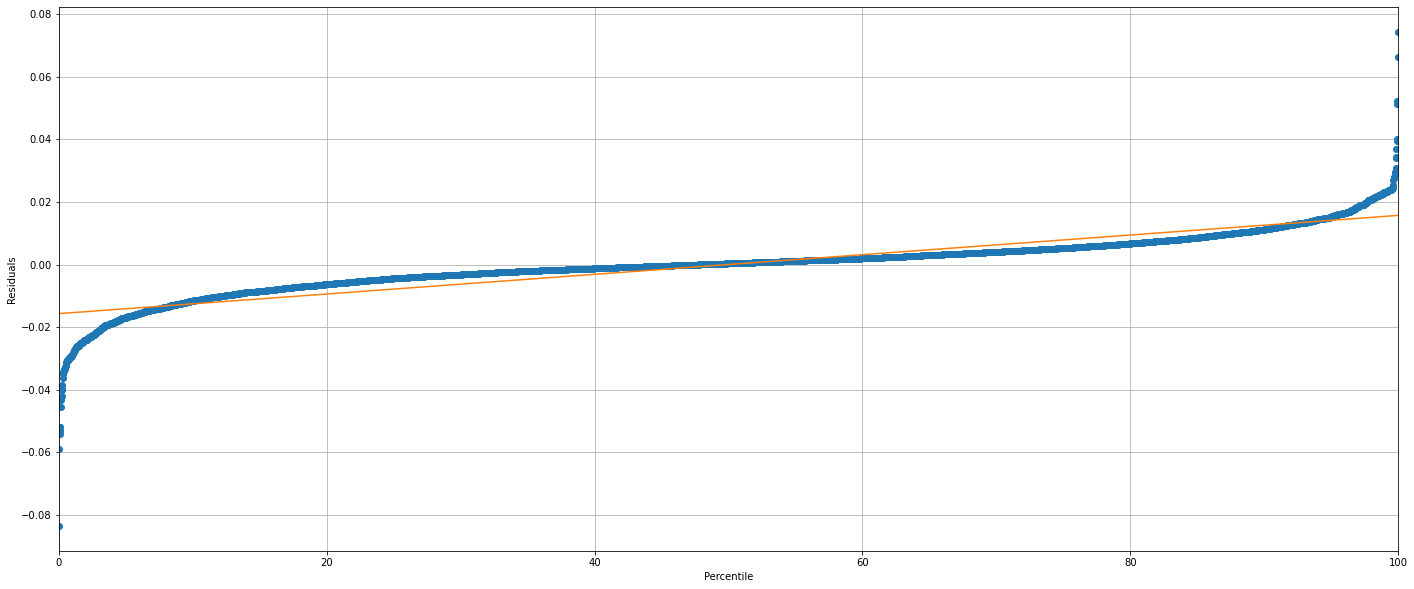

In [10]:
fig, ax = plt.subplots(figsize = (24, 10))
fig = probscale.probplot(res.resid, ax = ax, plottype = 'pp', bestfit = True, problabel = 'Percentile', datalabel = 'Residuals', scatter_kws = dict(label = "Model residuals"), 
                        line_kws = dict(label = "Best-Fit line"))
plt.grid(True)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2001-09-05,1132.939941,1135.520020,1114.859985,1131.739990,1131.739990,1384500000,-0.001059
2001-09-06,1131.739990,1131.739990,1105.829956,1106.400024,1106.400024,1359700000,-0.022390
2001-09-07,1106.400024,1106.400024,1082.119995,1085.780029,1085.780029,1424300000,-0.018637
2001-09-10,1085.780029,1096.939941,1073.150024,1092.540039,1092.540039,1276600000,0.006226
2001-09-17,1092.540039,1092.540039,1037.459961,1038.770020,1038.770020,2330830000,-0.049216


In [15]:
state = []
for i in range(len(df)):
    
    if df['returns'][i] > 0.001:
        state.append("up")
        
    elif df['returns'][i] < -0.001:
        state.append("down")
        
    else:
        state.append('no_change')

In [18]:
df['state'] = state
df['prev_state'] = df['state'].shift(1)
df.head()

<ipython-input-18-a821ddf91e36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = state
<ipython-input-18-a821ddf91e36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_state'] = df['state'].shift(1)


,Open,High,Low,Close,Adj Close,Volume,returns,state,prev_state
Date,,,,,,,,,
2001-09-05,1132.939941,1135.520020,1114.859985,1131.739990,1131.739990,1384500000,-0.001059,down,NaN
2001-09-06,1131.739990,1131.739990,1105.829956,1106.400024,1106.400024,1359700000,-0.022390,down,down
2001-09-07,1106.400024,1106.400024,1082.119995,1085.780029,1085.780029,1424300000,-0.018637,down,down
2001-09-10,1085.780029,1096.939941,1073.150024,1092.540039,1092.540039,1276600000,0.006226,up,down
2001-09-17,1092.540039,1092.540039,1037.459961,1038.770020,1038.770020,2330830000,-0.049216,down,up


In [19]:
state_space = df[['prev_state', 'state']]
state_space_matrix = df.groupby(['prev_state',
                                  'state']).size().unstack()
print(state_space_matrix); print()
print(state_space_matrix.sum())

state       down  no_change    up
prev_state                       
down         752        183  1063
no_change    240         93   284
up          1006        341  1066

state
down         1998
no_change     617
up           2413
dtype: int64


In [23]:
state_space = df[['prev_state', 'state']]
state_space_matrix = df.groupby(['prev_state','state']).size().unstack()
transition_matrix = state_space_matrix.apply(lambda x: x/float(x.sum()), axis=1)

In [24]:
def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

In [26]:
edges_wts = _get_markov_edges(transition_matrix)
print(edges_wts)

{('down', 'down'): 0.3763763763763764, ('no_change', 'down'): 0.3889789303079417, ('up', 'down'): 0.41690841276419394, ('down', 'no_change'): 0.0915915915915916, ('no_change', 'no_change'): 0.1507293354943274, ('up', 'no_change'): 0.1413178615830916, ('down', 'up'): 0.5320320320320321, ('no_change', 'up'): 0.46029173419773095, ('up', 'up'): 0.44177372565271444}


In [34]:
states = ['up', 'down', 'no_change']

# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(state_space_matrix)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
print(pd.DataFrame(G.edges(data=True)))    


Nodes:
['down', 'no_change', 'up']

Edges:
           0          1                                                  2
0       down       down  {'weight': 0.3763763763763764, 'label': 0.3763...
1       down  no_change  {'weight': 0.0915915915915916, 'label': 0.0915...
2       down         up  {'weight': 0.5320320320320321, 'label': 0.5320...
3  no_change       down  {'weight': 0.3889789303079417, 'label': 0.3889...
4  no_change  no_change  {'weight': 0.1507293354943274, 'label': 0.1507...
5  no_change         up  {'weight': 0.46029173419773095, 'label': 0.460...
6         up       down  {'weight': 0.41690841276419394, 'label': 0.416...
7         up  no_change  {'weight': 0.1413178615830916, 'label': 0.1413...
8         up         up  {'weight': 0.44177372565271444, 'label': 0.441...
